In [36]:
import pandas as pd
import numpy as np
from IPython.core.display import display, HTML
import sklearn

df = pd.read_csv("nyc-rolling-sales.csv")

In [37]:
import matplotlib.pyplot as plt
from scipy import stats



In [3]:
'Comment here, about the initial look (should view the df here)' 

'Comment here, about the initial look (should view the df here)'

In [2]:
drop_cols = ['Unnamed: 0', 'TAX CLASS AT PRESENT',
'BLOCK',
'LOT',
'EASE-MENT',
'RESIDENTIAL UNITS',
'COMMERCIAL UNITS',
'GROSS SQUARE FEET',
'SALE DATE',
'APARTMENT NUMBER',
"BUILDING CLASS AT TIME OF SALE", 
"TAX CLASS AT TIME OF SALE"]
df.drop(drop_cols, inplace = True, axis =1)


In [3]:
df = df.replace('-', 'NaN')
df = df.dropna()

In [4]:
df.reset_index(inplace= True)
df.drop('index', inplace = True, axis = 1)

In [5]:
pd.options.mode.chained_assignment = None
df['BOROUGH'] = df['BOROUGH'].astype(int)
df['ZIP CODE'] = df['ZIP CODE'].astype(int)
df['TOTAL UNITS'] = df['TOTAL UNITS'].astype(int)
df['YEAR BUILT'] = df['YEAR BUILT'].astype(int)

In [6]:
df = df[~df['LAND SQUARE FEET'].str.contains("-")]
df = df[~df['SALE PRICE'].str.contains("-")]

In [7]:
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors = 'coerce')
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors = 'coerce')

In [24]:
'Comment about rounding everything up to integers'

In [8]:
df['AVG PRICE PER UNIT'] = df['SALE PRICE'].divide(df['TOTAL UNITS'])

In [9]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,TOTAL UNITS,LAND SQUARE FEET,YEAR BUILT,SALE PRICE,AVG PRICE PER UNIT
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C2,153 AVENUE B,10009,5,1633,1900,6625000,1.325000e+06
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C4,154 EAST 7TH STREET,10009,10,2272,1913,3936272,3.936272e+05
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C2,301 EAST 10TH STREET,10009,6,2369,1900,8000000,1.333333e+06
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C4,210 AVENUE B,10009,8,1750,1920,3192840,3.991050e+05
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,D9,629 EAST 5TH STREET,10009,24,4489,1920,16232000,6.763333e+05


In [9]:
'''Eliminating the types of building that were not apartment like.
For the ones which class was somewhat similar to an apartment style, I calculated
how many of them there were in the dataset.
'''
len(df[df['BUILDING CLASS AT PRESENT'].str.contains('A0')])

309

In [10]:
df = df[~df['BUILDING CLASS AT PRESENT'].str.contains("A3")]
df = df[~df['BUILDING CLASS AT PRESENT'].str.contains("A6")]
df = df[~df['BUILDING CLASS AT PRESENT'].str.contains("A7")]
df = df[~df['BUILDING CLASS AT PRESENT'].str.contains("A8")]
df = df[~df['BUILDING CLASS AT PRESENT'].str.contains("CM")]
df = df[~df['BUILDING CLASS AT PRESENT'].str.contains("E")]
df = df[~df['BUILDING CLASS AT PRESENT'].str.contains("F")]
df = df[~df['BUILDING CLASS AT PRESENT'].str.contains("G")]
df = df[~df['BUILDING CLASS AT PRESENT'].str.contains("H")]
df = df[~df['BUILDING CLASS AT PRESENT'].str.contains("I")]
df = df[~df['BUILDING CLASS AT PRESENT'].str.contains("J")]
df = df[~df['BUILDING CLASS AT PRESENT'].str.contains("K")]
df = df[~df['BUILDING CLASS AT PRESENT'].str.contains("M")]
df = df[~df['BUILDING CLASS AT PRESENT'].str.contains("N")]
df = df[~df['BUILDING CLASS AT PRESENT'].str.contains("O")]
df = df[~df['BUILDING CLASS AT PRESENT'].str.contains("P")]
df = df[~df['BUILDING CLASS AT PRESENT'].str.contains("Q")]
df = df[~df['BUILDING CLASS AT PRESENT'].str.contains("R")]
df = df[~df['BUILDING CLASS AT PRESENT'].str.contains("T")]
df = df[~df['BUILDING CLASS AT PRESENT'].str.contains("U")]
df = df[~df['BUILDING CLASS AT PRESENT'].str.contains("V")]
df = df[~df['BUILDING CLASS AT PRESENT'].str.contains("W")]
df = df[~df['BUILDING CLASS AT PRESENT'].str.contains("Y")]
df = df[~df['BUILDING CLASS AT PRESENT'].str.contains("Z")]

In [11]:
df = df[df['BOROUGH'] == 1]

In [12]:
df.describe()


,BOROUGH,ZIP CODE,TOTAL UNITS,LAND SQUARE FEET,YEAR BUILT,SALE PRICE,AVG PRICE PER UNIT
count,748.0,748.000000,748.000000,748.000000,748.000000,7.480000e+02,7.480000e+02
mean,1.0,10031.299465,25.100267,5210.787433,1913.775401,1.022491e+07,1.674667e+06
std,0.0,41.817493,73.709254,15197.371169,20.599264,2.799013e+07,3.489273e+06
min,1.0,10001.000000,1.000000,384.000000,1800.000000,1.000000e+00,1.785714e-02
25%,1.0,10016.000000,3.000000,1702.250000,1900.000000,2.347994e+06,2.750000e+05
50%,1.0,10027.000000,9.000000,2148.000000,1910.000000,5.830734e+06,5.666667e+05
75%,1.0,10031.000000,20.000000,3750.000000,1920.000000,1.050000e+07,1.381250e+06
max,1.0,10463.000000,902.000000,189025.000000,2016.000000,6.200000e+08,4.100000e+07


In [100]:
'''Then I got a summary of the data in order to check whether I have missed something. 
For example, it turned out that the minimal price in the datasheet was 0. 

''''''

SyntaxError: invalid syntax (<ipython-input-100-2e8a82926ae4>, line 1)

In [17]:
'''I then proceeded to eliminate the entries which significantly stood out from the rest
of the dataset. I decided to calculate what is the percentage of such entries in order
to verify how big of a difference do they make.
'''

'I then proceeded to eliminate the entries which significantly stood out from the rest\nof the dataset. I decided to calculate what is the percentage of such entries in order\nto verify how big of a difference do they make.\n'

In [13]:
(len(df.loc[df['SALE PRICE'] < 10000000]))

544

In [14]:
(len(df))

748

In [15]:
float(len(df.loc[df['SALE PRICE'] < 1000]) / float(len (df)))

0.04144385026737968

In [16]:
float(len(df.loc[df['SALE PRICE'] < 10000000]) / float(len (df)))

0.7272727272727273

In [ ]:
'Insert a graph here'

In [17]:
df['EST RENT PRICE'] = df['AVG PRICE PER UNIT'].multiply(0.004)

In [18]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,TOTAL UNITS,LAND SQUARE FEET,YEAR BUILT,SALE PRICE,AVG PRICE PER UNIT,EST RENT PRICE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C2,153 AVENUE B,10009,5,1633,1900,6625000,1.325000e+06,5300.000000
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C4,154 EAST 7TH STREET,10009,10,2272,1913,3936272,3.936272e+05,1574.508800
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C2,301 EAST 10TH STREET,10009,6,2369,1900,8000000,1.333333e+06,5333.333333
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,C4,210 AVENUE B,10009,8,1750,1920,3192840,3.991050e+05,1596.420000
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,D9,629 EAST 5TH STREET,10009,24,4489,1920,16232000,6.763333e+05,2705.333333
11,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,D1,530-532 EAST 5TH STREET,10009,10,3717,2009,10350000,1.035000e+06,4140.000000
12,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,C6,244 EAST 7TH STREET,10009,24,4131,1928,11900000,4.958333e+05,1983.333333
113,1,ALPHABET CITY,14 RENTALS - 4-10 UNIT,S3,624 EAST 9TH STREET,10009,4,1520,1910,3300000,8.250000e+05,3300.000000
114,1,ALPHABET CITY,14 RENTALS - 4-10 UNIT,S4,165 AVENUE B,10009,5,2201,1900,7215000,1.443000e+06,5772.000000
115,1,ALPHABET CITY,14 RENTALS - 4-10 UNIT,S5,183 AVENUE B,10009,6,1779,1910,4750000,7.916667e+05,3166.666667


In [ ]:
'''
Based on the estimations which can be found in the Apartment Price Differences file, which included
comparing the calculated rent price with an average rent price on the streeteasy.com website, the final average
price has been estimated to be .6% of the the sale price.

ALSO need to estimate the minimal price
and eliminate the too cheap ones
'''

In [19]:
df.loc[df['EST RENT PRICE'].between(600, 700, inclusive = True)]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,TOTAL UNITS,LAND SQUARE FEET,YEAR BUILT,SALE PRICE,AVG PRICE PER UNIT,EST RENT PRICE
2795,1,GREENWICH VILLAGE-WEST,08 RENTALS - ELEVATOR APARTMENTS,D6,80 GROVE STREET,10014,76,3427,1929,12576515,165480.460526,661.921842
3185,1,HARLEM-CENTRAL,07 RENTALS - WALKUP APARTMENTS,C5,17 WEST 127TH STREET,10027,5,1799,1909,842500,168500.000000,674.000000
3208,1,HARLEM-CENTRAL,07 RENTALS - WALKUP APARTMENTS,C5,226 WEST 112 STREET,10026,8,1716,1890,1300000,162500.000000,650.000000
3253,1,HARLEM-CENTRAL,07 RENTALS - WALKUP APARTMENTS,C5,311 WEST 126 STREET,10027,10,1700,1910,1655000,165500.000000,662.000000
4182,1,HARLEM-UPPER,07 RENTALS - WALKUP APARTMENTS,C5,629 WEST 142 STREET,10031,8,1500,1926,1200000,150000.000000,600.000000
4245,1,INWOOD,07 RENTALS - WALKUP APARTMENTS,C7,151 WEST 228TH STREET,10463,20,3475,1915,3470000,173500.000000,694.000000
4262,1,INWOOD,07 RENTALS - WALKUP APARTMENTS,C4,125 VERMILYEA AVENUE,10034,17,3750,1910,2850000,167647.058824,670.588235
5145,1,MIDTOWN EAST,07 RENTALS - WALKUP APARTMENTS,C7,1057 1 AVENUE,10022,18,1856,1930,2950000,163888.888889,655.555556
9129,1,UPPER EAST SIDE (96-110),08 RENTALS - ELEVATOR APARTMENTS,D5,8-18 EAST 110 STREET,10029,60,14886,1910,10140400,169006.666667,676.026667
10593,1,WASHINGTON HEIGHTS UPPER,07 RENTALS - WALKUP APARTMENTS,C1,569 WEST 192 STREET,10040,29,7500,1924,4400000,151724.137931,606.896552


In [ ]:
'''
First! Execute the code which shows the coefficient of variation (so also std dev and mean). 
Clean the data. Then...
estimate the average rent (~0.4% * 1.5?) 
and make a separate cell. 
eliminate boroughs different from manhattan? - should be mentioned somwhere prior to this cell
maybe add more data to the apd.xls file 
Start training :)

Might need to figure out a better estimate bc sometimes under, sometimes overpriced

change everything to have inplace?
eliminate the one's for a dollar or so!

maybe do sth like ranking these apts low to high price, and the on the map 
use that (as probabiltity? or sth like that)

https://streeteasy.com/building/105-marble-hill-avenue-bronx#tab_building_detail=3
'''

In [22]:
import seaborn as sns
from scipy.stats import norm


    ##### df.loc[df['AVG PRICE PER UNIT'] > 1000000]

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
#Splitting the data into training and testing sets - shouldn't this also be in the beginning?
#Idts because then we'd have to do all these opertaions twice.
#Not all but some should be done before the seperation though, like eliminating the outliers

train, test = train_test_split(df, test_size=0.2)

In [27]:
train.shape

(598, 12)

In [28]:
test.shape

(150, 12)

In [29]:
(mu, sigma) = norm.fit(train['AVG PRICE PER UNIT'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))


 mu = 1743929.08 and sigma = 3620159.90



In [32]:
print "The value of the coefficient of variation: {:.3f}".format((sigma / mu))

The value of the coefficient of variation: 2.076


In [ ]:
### Since the coefficient of variation was too high, additional data cleaning was necessary". 

In [54]:
train.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,TOTAL UNITS,LAND SQUARE FEET,YEAR BUILT,SALE PRICE,AVG PRICE PER UNIT,EST RENT PRICE
149,1,CHELSEA,03 THREE FAMILY DWELLINGS,C0,444 WEST 22ND STREET,10011,3,2469,1901,8300000,2.766667e+06,11066.666667
2455,1,GRAMERCY,14 RENTALS - 4-10 UNIT,S3,194 THIRD AVENUE,10003,4,2300,1920,7700000,1.925000e+06,7700.000000
1337,1,EAST VILLAGE,07 RENTALS - WALKUP APARTMENTS,C7,341/2 SAINT MARKS PLACE,10003,12,1840,1900,8300000,6.916667e+05,2766.666667
9966,1,UPPER WEST SIDE (79-96),07 RENTALS - WALKUP APARTMENTS,C3,6 WEST 95TH STREET,10025,4,1678,1900,5100000,1.275000e+06,5100.000000
3881,1,HARLEM-EAST,07 RENTALS - WALKUP APARTMENTS,C3,184 EAST 111 STREET,10029,4,1766,1890,1469500,3.673750e+05,1469.500000


/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


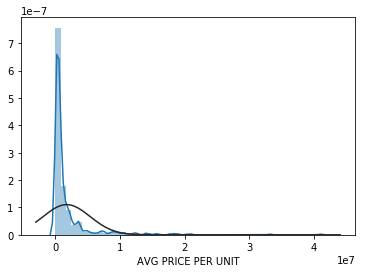

In [56]:
sns.distplot(train['AVG PRICE PER UNIT'], fit= norm)

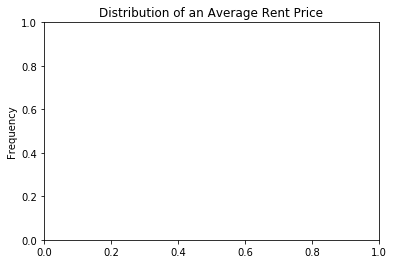

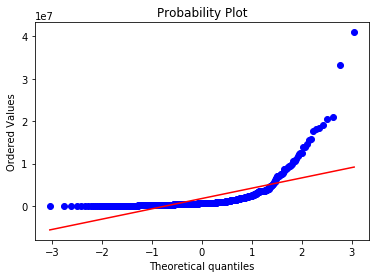

Skewness: 5.215868
Kurtosis: 38.046141


In [42]:

plt.ylabel('Frequency')
plt.title('Distribution of an Average Rent Price')

fig = plt.figure()
res = stats.probplot(train['AVG PRICE PER UNIT'], plot=plt) #why is it blank
plt.show()

print("Skewness: %f" % train['AVG PRICE PER UNIT'].skew())
print("Kurtosis: %f" % train['AVG PRICE PER UNIT'].kurt())

#idk what's the first one lol